# Impact of Dimensionally Reduction Method on Non-Linear Classifier Performance  
# Bank Marketing Dataset

#### Business Understanding

This raw data was extracted from the UCI Machine Learning Repository found at: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. It was then cleaned during Project 1 and the cleaned dataset will be used in this study.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls to contact client to check if the bank term deposit would be subscribed.Sometimes, more than one contact to the same client was required, in order to access if the product would be ('yes') or not ('no') subscribed.

#### Data understanding
Attribute Information:

Input variables: bank client data: 1 - age (numeric)

2 - job : type of job (categorical) -admin -blue collar -entrepreneur -housemaid -management -retired -self-employed -services -student -technician -unemployed -unknown

3 - marital : marital status (categorical) -divorced (means divorced or widowed) -married -single -unknown

4 - education (categorical) -basic.4y -basic.6y -basic.9y -high.school -illiterate -professional.course -university.degree -unknown

5 - default: has credit in default? (categorical: -no -yes -unknown

6 - housing: has housing loan? (categorical) -no -yes -unknown

7 - loan: has personal loan? (categorical) -no -yes -unknown

related with the last contact of the current campaign: 8 - contact: contact communication type (categorical) -cellular -telephone

9 - month: last contact month of year (categorical) -jan -feb -mar . . . -dec

10 - day_of_week: last contact day of the week (categorical) -mon -tue -wed -thu -fri

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes: 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 14 - previous: number of contacts performed before this campaign and for this client (numeric) 15 - poutcome: outcome of the previous marketing campaign (categorical) -failure -nonexistent -success

social and economic context attributes 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 19 - euribor3m: euribor 3 month rate - daily indicator (numeric) 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): 21 - y - has the client subscribed a term deposit? (binary) yes no

In [1]:
import pandas as pd
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("cleaned_data.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39840 entries, 0 to 39839
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39840 non-null  int64  
 1   job             39840 non-null  object 
 2   marital         39840 non-null  object 
 3   education       39840 non-null  object 
 4   default         39840 non-null  int64  
 5   housing         39840 non-null  int64  
 6   loan            39840 non-null  int64  
 7   contact         39840 non-null  object 
 8   month           39840 non-null  object 
 9   day_of_week     39840 non-null  object 
 10  duration        39840 non-null  int64  
 11  campaign        39840 non-null  int64  
 12  pdays           39840 non-null  int64  
 13  previous        39840 non-null  int64  
 14  poutcome        39840 non-null  object 
 15  emp.var.rate    39840 non-null  float64
 16  cons.price.idx  39840 non-null  float64
 17  cons.conf.idx   39840 non-null 

<AxesSubplot:xlabel='y', ylabel='count'>

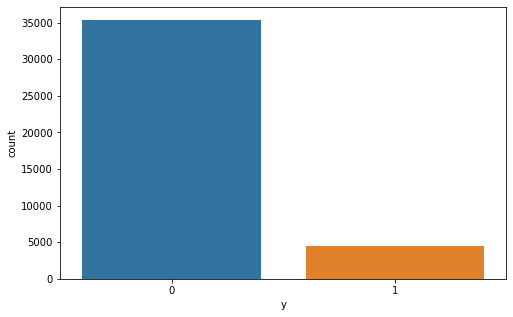

In [4]:
# data exploration
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="y", data=df)

In [5]:
df['y'].value_counts()

0    35375
1     4465
Name: y, dtype: int64

In [6]:
for column in df.columns: 
    if df[column].dtype=='object':
        print(column)

job
marital
education
contact
month
day_of_week
poutcome


In [7]:
df["month"].value_counts()

may    13322
jul     6971
aug     5982
jun     5094
nov     4008
apr     2549
oct      682
sep      536
mar      524
dec      172
Name: month, dtype: int64

In [8]:
# encode month to numerical value eg Jan to 1, Feb to 2, etc. 
month = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
df["month"] = df["month"].apply(lambda x: month.index(x)+1).astype("category")
df["month"].value_counts()

5     13322
7      6971
8      5982
6      5094
11     4008
4      2549
10      682
9       536
3       524
12      172
Name: month, dtype: int64

In [9]:
df["day_of_week"].value_counts()

thu    8339
mon    8246
wed    7878
tue    7813
fri    7564
Name: day_of_week, dtype: int64

In [10]:
# encode day_of_week to to numerical value
dow = ["mon", "tue", "wed", "thu", "fri"]
df["day_of_week"] = df["day_of_week"].apply(lambda x: dow.index(x)+1)
df["day_of_week"] = df["day_of_week"].astype("category")

In [11]:
# label encode the other categorical data using label encoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

for column in [x for x in df.columns if df[x].dtype=="object"]: 
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    df[column] = df[column].astype("category")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,5,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,5,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,5,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,5,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,5,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [12]:
# normalise data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_data = scaler.fit_transform(df)
df_norm = pd.DataFrame(norm_data, columns=df.columns)
df_norm.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.3,0.5,0.000000,0.0,0.0,0.0,1.0,0.222222,0.0,0.053070,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.7,0.5,0.500000,0.0,0.0,0.0,1.0,0.222222,0.0,0.030297,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.7,0.5,0.500000,0.0,1.0,0.0,1.0,0.222222,0.0,0.045954,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.0,0.5,0.166667,0.0,0.0,0.0,1.0,0.222222,0.0,0.030704,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.7,0.5,0.500000,0.0,0.0,1.0,1.0,0.222222,0.0,0.062424,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


### SFS

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

pred_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20, max_depth=5)

feature_selector = SFS(pred_model, k_features='best', forward=True, scoring='f1', cv=5)
features1 = feature_selector.fit(df_norm.iloc[:, :-1] , df_norm.iloc[:, -1])

filtered_features= df.columns[list(features1.k_feature_idx_)] 
print(filtered_features)
print(features1.k_score_)

Index(['age', 'contact', 'duration', 'poutcome'], dtype='object')
0.39266803483436635


In [14]:
# test train split using the selected features
from sklearn.model_selection import train_test_split
import numpy as np

features_id = np.array(features1.k_feature_idx_)
X = df_norm.iloc[:, features_id]
y = df_norm['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     10613
         1.0       0.65      0.37      0.47      1339

    accuracy                           0.91     11952
   macro avg       0.79      0.67      0.71     11952
weighted avg       0.89      0.91      0.90     11952



Text(0.5, 17.5, 'Predicted label')

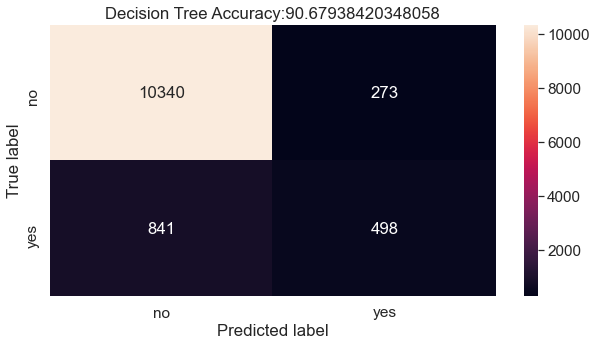

In [15]:
# build the decision tree model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

# Build full model with selected features
tree_SFS = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20, random_state=0)
tree_SFS.fit(X_train, y_train)
y_pred = tree_SFS.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['no','yes'], 
                     columns = ['no','yes'])

# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
plt.title("Decision Tree Accuracy:" + str((y_test == y_pred).sum()/X_test.shape[0]*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

### PCA

In [16]:
# split the data to X and Y
X = df_norm.iloc[:, :-1]
y = df_norm.iloc[:, -1]

    components  variance
0            1  0.265611
1            2  0.415748
2            3  0.526875
3            4  0.611174
4            5  0.690895
5            6  0.766638
6            7  0.832670
7            8  0.886168
8            9  0.921910
9           10  0.949911
10          11  0.965170
11          12  0.977621
12          13  0.986037
13          14  0.993652
14          15  0.996247
15          16  0.997912
16          17  0.998920
17          18  0.999499
18          19  0.999954
19          20  1.000000


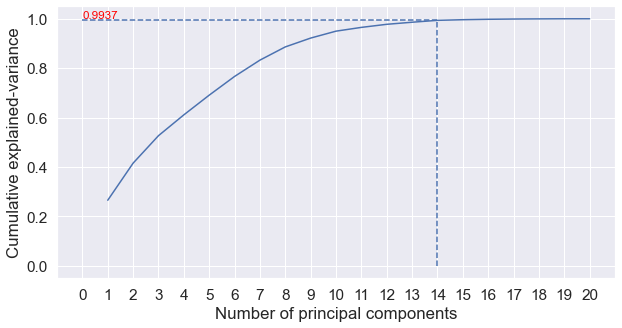

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(X)

df_var = pd.DataFrame({"components": np.arange(1,df_norm.shape[1],1), "variance": np.cumsum(pca.explained_variance_ratio_)})
print(df_var)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,df_norm.shape[1],1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0,df_norm.shape[1],1))
plt.vlines(x=14, ymin=0, ymax=df_var.iloc[13,1], ls='--')
plt.hlines(y=df_var.iloc[13,1], xmin=0, xmax=14, ls='--')
plt.text(0,df_var.iloc[13,1], "{:.4f}".format(df_var.iloc[13,1]), color="red", 
        ha="left", va="bottom", fontsize="x-small")

plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained-variance")

plt.show()

The cumulative explain ratio is at 99.4% with 14 components, which itself is >99%. Choose k as 14. 

In [18]:
pca = PCA(n_components=14)
pca_data = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.3, random_state=0, stratify=y)

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     10613
         1.0       0.64      0.24      0.35      1339

    accuracy                           0.90     11952
   macro avg       0.78      0.61      0.65     11952
weighted avg       0.88      0.90      0.88     11952



Text(0.5, 17.5, 'Predicted label')

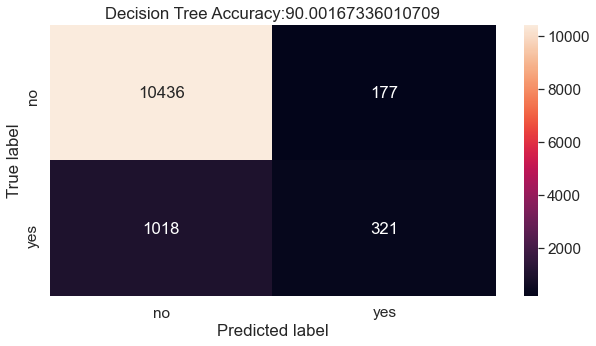

In [19]:
# Build full model with transformed data
tree_PCA = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20, random_state=0)
tree_PCA.fit(X_train, y_train)
y_pred = tree_PCA.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['no','yes'], 
                     columns = ['no','yes'])

# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)
plt.title("Decision Tree Accuracy:" + str((y_test == y_pred).sum()/X_test.shape[0]*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')